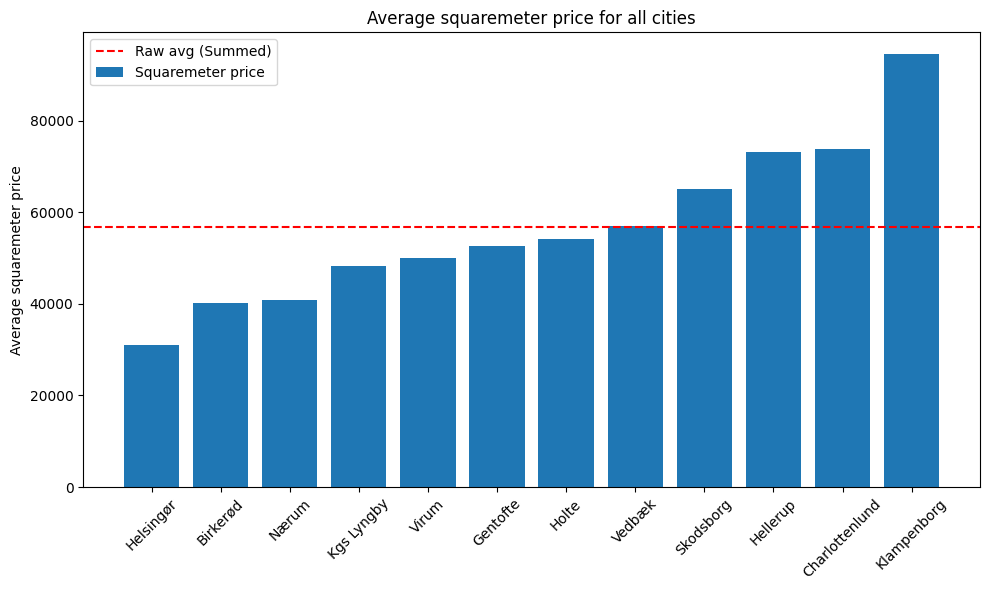

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = {'2800': 'Kgs Lyngby', '2820': 'Gentofte', '2830': 'Virum', '2840': 'Holte', '2850': 'Nærum', '2900': 'Hellerup', '2920': 'Charlottenlund', '2930': 'Klampenborg', '2942': 'Skodsborg', '2950': 'Vedbæk', '3000': 'Helsingør', '3460': 'Birkerød'}
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for all 12 cities
avg_all_cities = []

for df in dataframes:
    average = df['Squaremeter price'].mean()
    avg_all_cities.append(average)

# Sorter by stigende gennemsnitspris
sorted_avg_all_cities, sorted_cities = zip(*sorted(zip(avg_all_cities, cities.values())))

# Calculate raw average (does not take into account how many for sale in each city)
avg_raw = sum(sorted_avg_all_cities) / len(sorted_avg_all_cities)

# Plots
plt.figure(figsize=(10, 6))
plt.bar(sorted_cities, sorted_avg_all_cities, label='Squaremeter price')

plt.axhline(y=avg_raw, color='red', linestyle='--', label='Raw avg (Summed)')
plt.ylabel('Average squaremeter price')
plt.title('Average squaremeter price for all cities')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


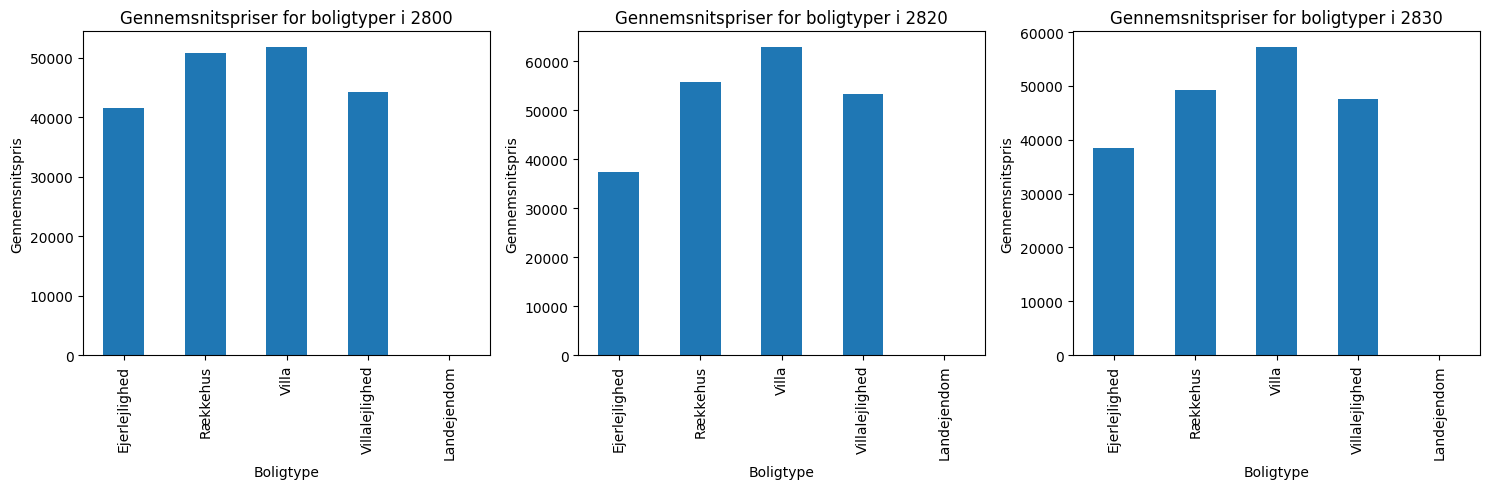

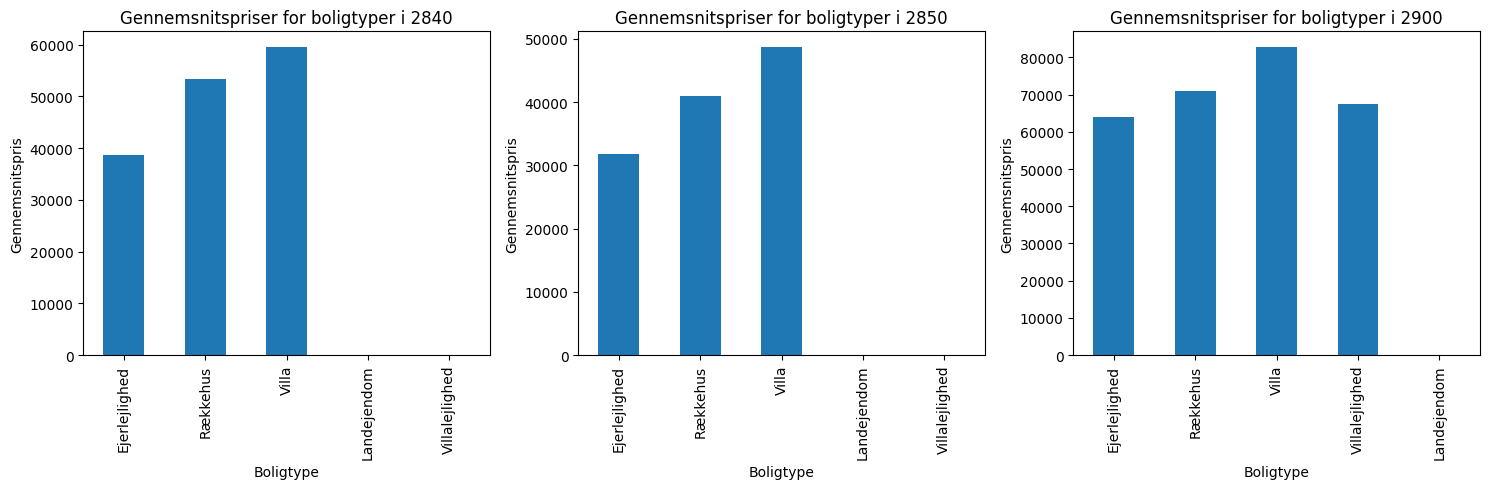

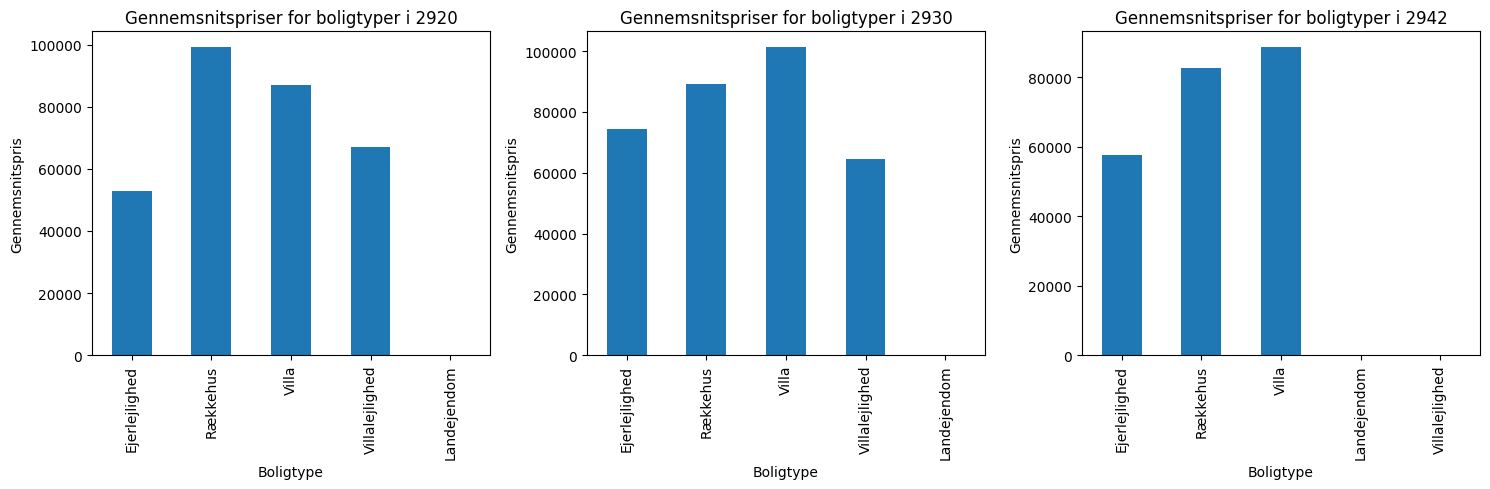

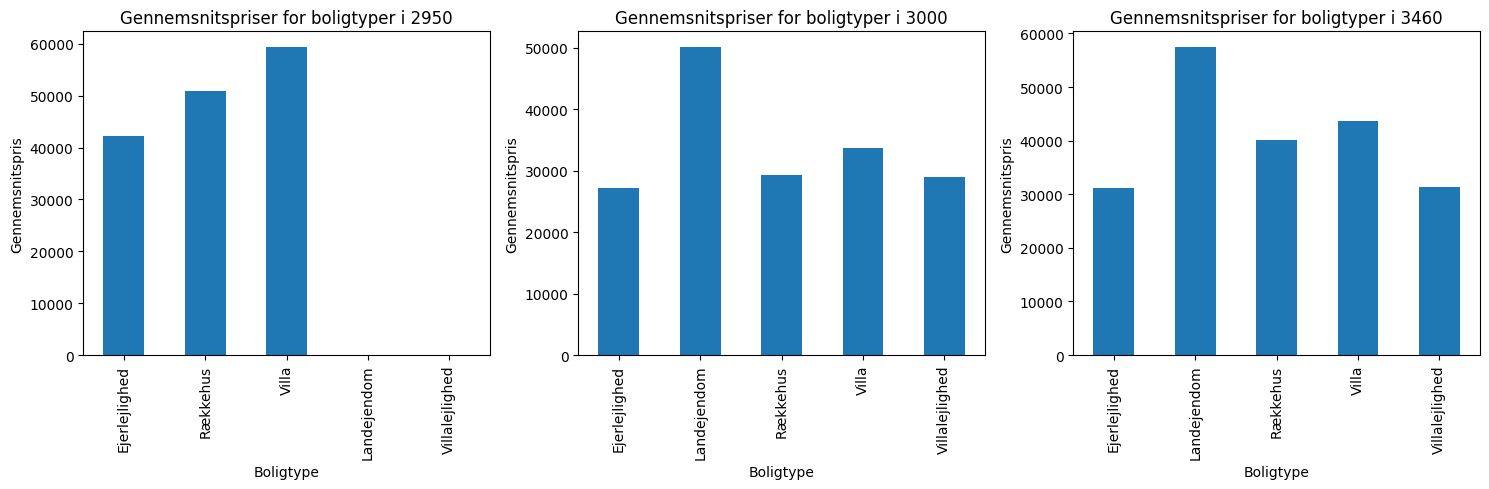

In [3]:
# This code shows the average price for different housetypes split by zip codes
import pandas as pd
import matplotlib.pyplot as plt

# Read data from CSV-files for all 12 cities
cities = ['2800', '2820', '2830', '2840', '2850', '2900', '2920', '2930', '2942', '2950', '3000', '3460']
dataframes = []

for city in cities:
    filename = f'./data/house_data/house_data_{city}.csv'
    df = pd.read_csv(filename)
    dataframes.append(df)

# Calculate average squaremeter price for each city and type
averages = {}

# Set the number of plots per row
plots_per_row = 3

for i, (df, city) in enumerate(zip(dataframes, cities)):
    city_averages = df.groupby('Type')['Squaremeter price'].mean()
    all_types = ['Ejerlejlighed' ,'Landejendom','Rækkehus', 'Villalejlighed', 'Villa']  # All possible types (Danish)
    
    # Loop thorugh all types and validate they exists in city_averages
    for typ in all_types:
        if typ not in city_averages.index:
            # If the type is missing, replace the average price with 0
            city_averages[typ] = 0
    
    
    # Build a new figure and axis for each city
    if i % plots_per_row == 0:
        fig, axs = plt.subplots(nrows=1, ncols=plots_per_row, figsize=(15, 5))
    
    # Calculate row- and columnindexes for subplot
    row_index = i // plots_per_row
    col_index = i % plots_per_row
    
    # Make a bar plot for the average prices
    city_averages.plot(kind='bar', ax=axs[col_index])
    
    # Add a titel and labels to the plot
    axs[col_index].set_title(f'Gennemsnitspriser for boligtyper i {city}')
    axs[col_index].set_xlabel('Boligtype')
    axs[col_index].set_ylabel('Gennemsnitspris')
    
    # Show the plot for the actual city
    if (i + 1) % plots_per_row == 0 or i == len(dataframes) - 1:
        plt.tight_layout()
        plt.show()
